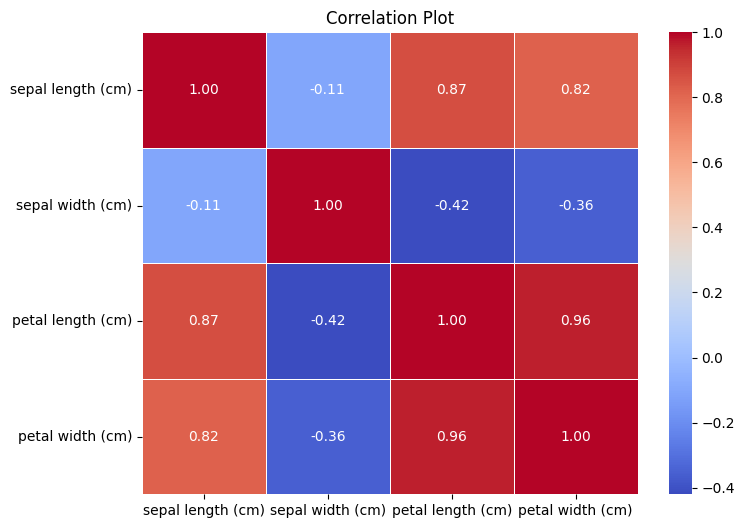

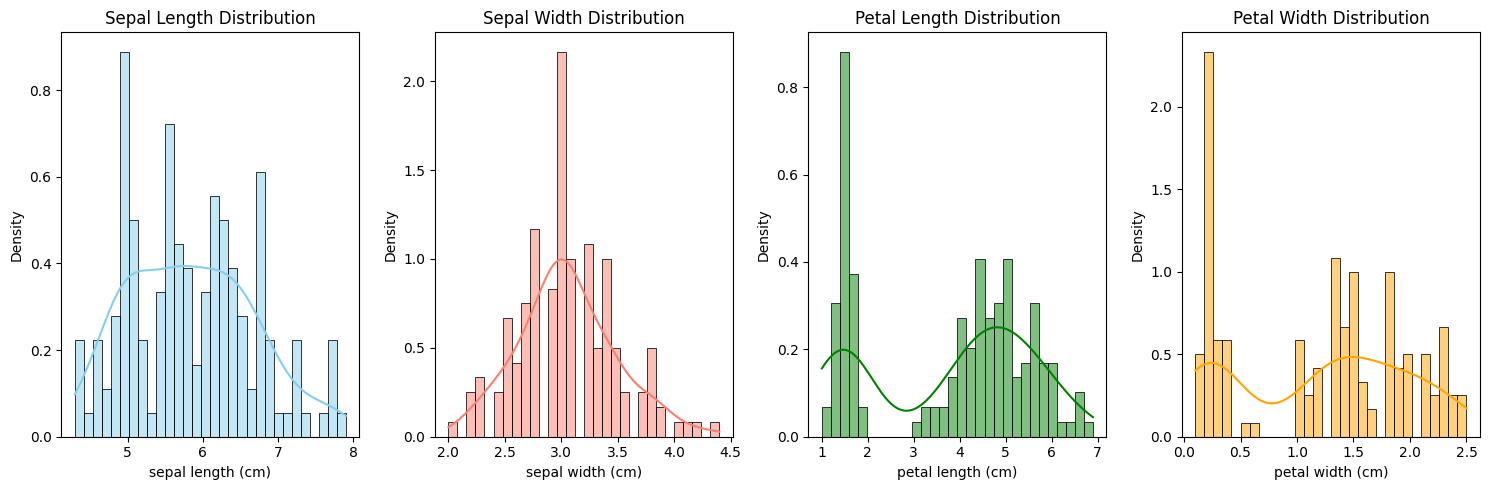

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.198667  
std            0.763161  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Hypothesis Test:
Null hypothesis: There is no significant difference in sepal length between Setosa and Versicolor species.
Alternative hypothesis: There is a 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_ind

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
iris_data = pd.read_csv(url, names=column_names)

# Correlation plot (excluding 'target' column)
plt.figure(figsize=(8, 6))
sns.heatmap(iris_data.drop('target', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

# Distribution plot for each column
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
sns.histplot(iris_data['sepal length (cm)'], kde=True, color='skyblue', stat='density', bins=30)
plt.title('Sepal Length Distribution')

plt.subplot(1, 4, 2)
sns.histplot(iris_data['sepal width (cm)'], kde=True, color='salmon', stat='density', bins=30)
plt.title('Sepal Width Distribution')

plt.subplot(1, 4, 3)
sns.histplot(iris_data['petal length (cm)'], kde=True, color='green', stat='density', bins=30)
plt.title('Petal Length Distribution')

plt.subplot(1, 4, 4)
sns.histplot(iris_data['petal width (cm)'], kde=True, color='orange', stat='density', bins=30)
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()

# Summary statistics
summary_stats = iris_data.describe()
print("Summary Statistics:")
print(summary_stats)

# Convert target column to numerical values for hypothesis test
iris_data['target'] = iris_data['target'].astype('category').cat.codes

# Hypothesis test (t-test)
setosa = iris_data[iris_data['target'] == 0]
versicolor = iris_data[iris_data['target'] == 1]

t_stat, p_value = ttest_ind(setosa['sepal length (cm)'], versicolor['sepal length (cm)'])

print("\nHypothesis Test:")

# if the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in sepal length between 
# Setosa and Versicolor species. If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis, indicating no 
# significant difference in sepal length between the two species.

print("Null hypothesis: There is no significant difference in sepal length between Setosa and Versicolor species.")
print("Alternative hypothesis: There is a significant difference in sepal length between Setosa and Versicolor species.")

# Negative t-statistic: The sample mean of the first group is less than the sample mean of the second group. 
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
